# CSI5341 - Assignment 1
Mohammad Heydari - 300273718

In [1]:
# This cell is for initializing google drive skip it if you are running the 
# notebook locally.


from google.colab import drive
import os
from pathlib import Path

drive.mount('/drive')
drive_path = Path('/drive/My Drive/')
os.chdir(drive_path)
os.listdir()

Mounted at /drive


['Pix2Pix', 'Colab Notebooks', 'Intersection', 'EnglishImg']

### importing packages

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.exposure import equalize_hist
from skimage.io import imread, imshow, imsave
from skimage.transform import resize

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

%matplotlib inline
np.random.seed(42)

### forming the dataset

In [2]:
data_dir = Path("EnglishImg/English/Img/GoodImg/Bmp")

# we use this to assign classes to samples based on their directory
label_map = {"Sample009":"8", "Sample017":"G", "Sample051":"o", "Sample053":"q"}

# we create an empty dataframe to keep track of the samples
df = pd.DataFrame(columns=['data', 'target'])

# i=0
# each folder stands for a class
for folder in data_dir.iterdir():
    for sample in folder.iterdir():
        img = rgb2gray(imread(sample))
        # I also tried applying a mask to each image but there was not a 
        # significant change in the results

        # mask = imread(str(sample).replace('Bmp', 'Msk'), as_gray=True)/255
        # img = img*mask
        
        # I tried 16*16 and 32*32 and I concluded that bigger size can be more
        # confusing for the classifier
        img = resize(equalize_hist(img), [16,16])
        
        # plt.imshow(img, cmap='gray')
        # plt.show()
        # i+=1

        # we store each image as a vector in one column and its label in the other column
        df = df.append({'data':img.flatten(), 'target':label_map[str(folder).split('/')[-1]]}, ignore_index=True)

    #     if i>5:
    #         break
    # i=0

NameError: name 'Path' is not defined

## 1.2 Binary Classiers

### o/q classifier with cross validation and stratified sampling.


size of the train set: 161
size of the test set: 41
accuracy on training set:0.84472049689441
average recall on training set:0.7093023255813954
avg_precision on training set:0.9125874125874126
avg_f1 on training set:0.7471892469066013


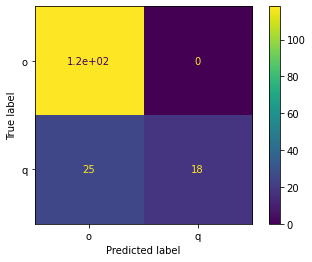

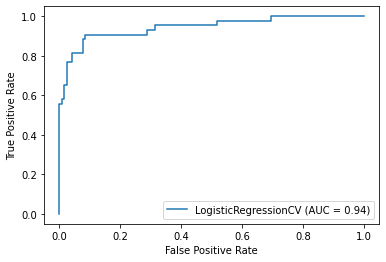

In [54]:
# the subset of samples in the class q or o
df_oq = df[(df.target=='q')|(df.target =='o')]

# split %20 data as the test set and the rest will be used as the training set
x_train, x_test, y_train, y_test = train_test_split(np.array([s for s in df_oq.data]), df_oq.target.to_numpy(), test_size=0.2, stratify=df_oq.target.to_numpy(), shuffle=True)

print(f"size of the train set: {y_train.shape[0]}")
print(f"size of the test set: {y_test.shape[0]}")

# by default the classifier uses 5-fold split i.e. %20 of the training will be used for validation
# we choose a big number for maximum iteration to make sure the algorithm converges
clf = LogisticRegressionCV(max_iter=1000)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
cm_train = confusion_matrix(y_train, pred_train)

# for average values we assume one class as P and the other one as N each time
accuracy = (cm_train[0,0]+ cm_train[1,1])/np.sum(cm_train)
avg_recall = (cm_train[0,0]/np.sum(cm_train[0,:]) + cm_train[1,1]/np.sum(cm_train[1,:]))/2
avg_precision = (cm_train[0,0]/np.sum(cm_train[:,0]) + cm_train[1,1]/np.sum(cm_train[:,1]))/2
avg_f1 = (2*cm_train[0,0]/(np.sum(cm_train[:,0])+ np.sum(cm_train[0,:])) + 2*cm_train[1,1]/(np.sum(cm_train[:,1])+ np.sum(cm_train[1,:])))/2

# we use this function to plot confusion matrix and ROC curve neater
plot_confusion_matrix(clf, x_train,  y_train)
plot_roc_curve(clf, x_train,  y_train)

print(f"accuracy on training set:{accuracy}")
print(f"average recall on training set:{avg_recall}")
print(f"avg_precision on training set:{avg_precision}")
print(f"avg_f1 on training set:{avg_f1}")



accuracy on test set:0.7804878048780488
average recall on test set:0.6196969696969696
avg_precision on test set:0.7668918918918919
avg_f1 on test set:0.6328358208955224


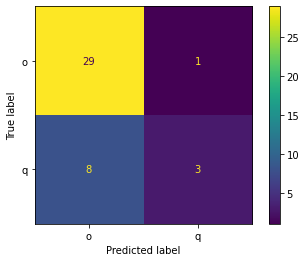

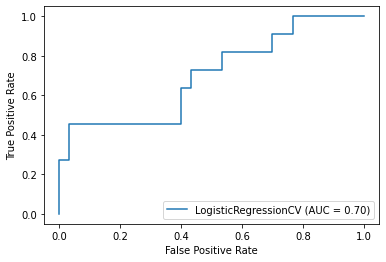

In [55]:
pred_test = clf.predict(x_test)
cm_test = confusion_matrix(y_test, pred_test)

accuracy = (cm_test[0,0]+ cm_test[1,1])/np.sum(cm_test)
avg_recall = (cm_test[0,0]/np.sum(cm_test[0,:]) + cm_test[1,1]/np.sum(cm_test[1,:]))/2
avg_precision = (cm_test[0,0]/np.sum(cm_test[:,0]) + cm_test[1,1]/np.sum(cm_test[:,1]))/2
avg_f1 = (2*cm_test[0,0]/(np.sum(cm_test[:,0])+ np.sum(cm_test[0,:])) + 2*cm_test[1,1]/(np.sum(cm_test[:,1])+ np.sum(cm_test[1,:])))/2

plot_confusion_matrix(clf, x_test,  y_test)
plot_roc_curve(clf, x_test,  y_test)

print(f"accuracy on test set:{accuracy}")
print(f"average recall on test set:{avg_recall}")
print(f"avg_precision on test set:{avg_precision}")
print(f"avg_f1 on test set:{avg_f1}")


* ### Conclusion on this part: 
There are 30 instances of o and 11 instances of q in the test set. 29 of the 'o's are correctly classified but 8 of the 'q's were wrongly predicted. As a result the precision on the on the o class and the recall on the q class are low and the precision on the q class and the recall on the o class are high. The average values of these are also reported. It seems like because of the imbalance of the classes the classifier tends to predict the class with more frequency. Even on the training set, the model misclassifies the q instances almost %50 of the times. Also there is a significant gap between the AUC on the training set and the test set.

### o/q classifier with cross validation and random sampling.


size of the train set: 161
size of the test set: 41
accuracy on training set:0.8385093167701864
average recall on training set:0.6981792717086834
avg_precision on training set:0.8848096348096348
avg_f1 on training set:0.7337150127226463


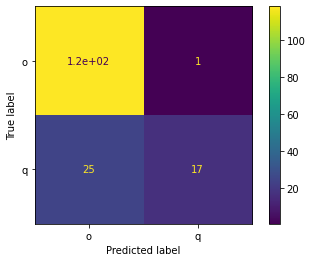

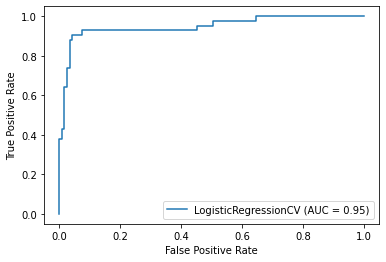

In [50]:
x_train, x_test, y_train, y_test = train_test_split(np.array([s for s in df_oq.data]), df_oq.target.to_numpy(), test_size=0.2, shuffle=True)

print(f"size of the train set: {y_train.shape[0]}")
print(f"size of the test set: {y_test.shape[0]}")

clf = LogisticRegressionCV(max_iter=1000)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
cm_train = confusion_matrix(y_train, pred_train)

accuracy = (cm_train[0,0]+ cm_train[1,1])/np.sum(cm_train)
avg_recall = (cm_train[0,0]/np.sum(cm_train[0,:]) + cm_train[1,1]/np.sum(cm_train[1,:]))/2
avg_precision = (cm_train[0,0]/np.sum(cm_train[:,0]) + cm_train[1,1]/np.sum(cm_train[:,1]))/2
avg_f1 = (2*cm_train[0,0]/(np.sum(cm_train[:,0])+ np.sum(cm_train[0,:])) + 2*cm_train[1,1]/(np.sum(cm_train[:,1])+ np.sum(cm_train[1,:])))/2

plot_confusion_matrix(clf, x_train,  y_train)
plot_roc_curve(clf, x_train,  y_train)

print(f"accuracy on training set:{accuracy}")
print(f"average recall on training set:{avg_recall}")
print(f"avg_precision on training set:{avg_precision}")
print(f"avg_f1 on training set:{avg_f1}")


accuracy on test set:0.7317073170731707
average recall on test set:0.5660919540229885
avg_precision on test set:0.7017543859649122
avg_f1 on test set:0.5512437810945273


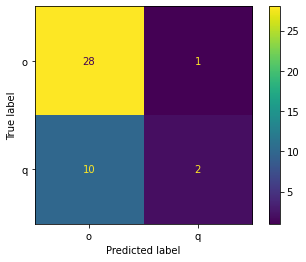

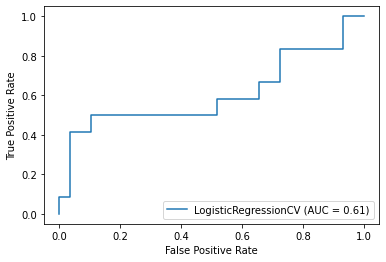

In [51]:
pred_test = clf.predict(x_test)
cm_test = confusion_matrix(y_test, pred_test)

accuracy = (cm_test[0,0]+ cm_test[1,1])/np.sum(cm_test)
avg_recall = (cm_test[0,0]/np.sum(cm_test[0,:]) + cm_test[1,1]/np.sum(cm_test[1,:]))/2
avg_precision = (cm_test[0,0]/np.sum(cm_test[:,0]) + cm_test[1,1]/np.sum(cm_test[:,1]))/2
avg_f1 = (2*cm_test[0,0]/(np.sum(cm_test[:,0])+ np.sum(cm_test[0,:])) + 2*cm_test[1,1]/(np.sum(cm_test[:,1])+ np.sum(cm_test[1,:])))/2

plot_confusion_matrix(clf, x_test,  y_test)
plot_roc_curve(clf, x_test,  y_test)

print(f"accuracy on test set:{accuracy}")
print(f"average recall on test set:{avg_recall}")
print(f"avg_precision on test set:{avg_precision}")
print(f"avg_f1 on test set:{avg_f1}")

* ### Conclusion on this part: 
In stratified splitting, the frequency of classes in the actual set is maintained in the train set and the test set. Consequently, the model is more stable in its performence. But this constraint will not necessarily be held when we use random splitting. Here also more of the q samples are brought in the test set. Since it is harder for the classifier to predict 'q's due to imbalance, when there are more q instances in the test set, the gap of performance between the training and testing is greater. The AUC was 0.94 to 0.70 in stratified version but now it is 0.95 to 0.61.




### G/8 classifier with cross validation and stratified sampling.



size of the train set: 140
size of the test set: 35
accuracy on training set:0.8785714285714286
average recall on training set:0.6730769230769231
avg_precision on training set:0.9351145038167938
avg_f1 on training set:0.7224489795918367


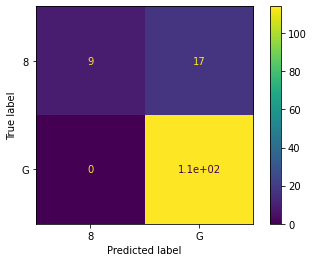

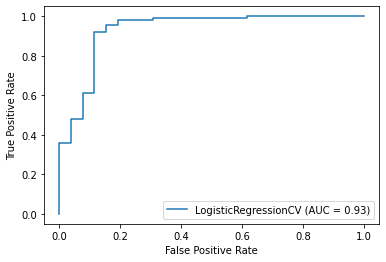

In [62]:
df_G8 = df[(df.target=='G')|(df.target =='8')]
x_train, x_test, y_train, y_test = train_test_split(np.array([s for s in df_G8.data]), df_G8.target.to_numpy(), test_size=0.2, stratify=df_G8.target.to_numpy(), shuffle=True)

print(f"size of the train set: {y_train.shape[0]}")
print(f"size of the test set: {y_test.shape[0]}")

clf = LogisticRegressionCV(max_iter=1000)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
cm_train = confusion_matrix(y_train, pred_train)

accuracy = (cm_train[0,0]+ cm_train[1,1])/np.sum(cm_train)
avg_recall = (cm_train[0,0]/np.sum(cm_train[0,:]) + cm_train[1,1]/np.sum(cm_train[1,:]))/2
avg_precision = (cm_train[0,0]/np.sum(cm_train[:,0]) + cm_train[1,1]/np.sum(cm_train[:,1]))/2
avg_f1 = (2*cm_train[0,0]/(np.sum(cm_train[:,0])+ np.sum(cm_train[0,:])) + 2*cm_train[1,1]/(np.sum(cm_train[:,1])+ np.sum(cm_train[1,:])))/2
plot_confusion_matrix(clf, x_train,  y_train)
plot_roc_curve(clf, x_train,  y_train)

print(f"accuracy on training set:{accuracy}")
print(f"average recall on training set:{avg_recall}")
print(f"avg_precision on training set:{avg_precision}")
print(f"avg_f1 on training set:{avg_f1}")

accuracy on test set:0.8571428571428571
average recall on test set:0.5833333333333334
avg_precision on test set:0.9264705882352942
avg_f1 on test set:0.6031746031746031


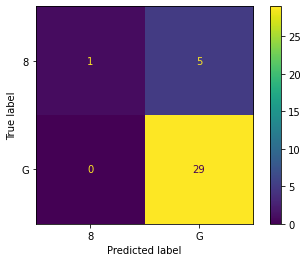

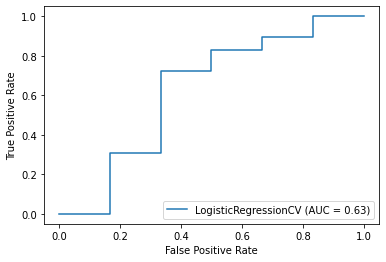

In [63]:
pred_test = clf.predict(x_test)
cm_test = confusion_matrix(y_test, pred_test)

accuracy = (cm_test[0,0]+ cm_test[1,1])/np.sum(cm_test)
avg_recall = (cm_test[0,0]/np.sum(cm_test[0,:]) + cm_test[1,1]/np.sum(cm_test[1,:]))/2
avg_precision = (cm_test[0,0]/np.sum(cm_test[:,0]) + cm_test[1,1]/np.sum(cm_test[:,1]))/2
avg_f1 = (2*cm_test[0,0]/(np.sum(cm_test[:,0])+ np.sum(cm_test[0,:])) + 2*cm_test[1,1]/(np.sum(cm_test[:,1])+ np.sum(cm_test[1,:])))/2
plot_confusion_matrix(clf, x_test,  y_test)
plot_roc_curve(clf, x_test,  y_test)

print(f"accuracy on test set:{accuracy}")
print(f"average recall on test set:{avg_recall}")
print(f"avg_precision on test set:{avg_precision}")
print(f"avg_f1 on test set:{avg_f1}")

### G/8 classifier with cross validation and random sampling.

size of the train set: 140
size of the test set: 35
accuracy on training set:0.8571428571428571
average recall on training set:0.6296296296296297
avg_precision on training set:0.924812030075188
avg_f1 on training set:0.6652319464371115


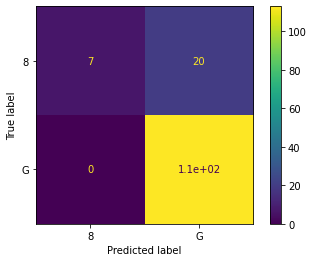

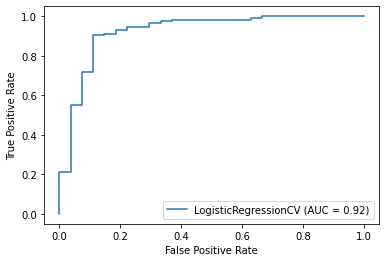

In [65]:
df_G8 = df[(df.target=='G')|(df.target =='8')]
x_train, x_test, y_train, y_test = train_test_split(np.array([s for s in df_G8.data]), df_G8.target.to_numpy(), test_size=0.2, shuffle=True)

print(f"size of the train set: {y_train.shape[0]}")
print(f"size of the test set: {y_test.shape[0]}")

clf = LogisticRegressionCV(max_iter=1000)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
cm_train = confusion_matrix(y_train, pred_train)

accuracy = (cm_train[0,0]+ cm_train[1,1])/np.sum(cm_train)
avg_recall = (cm_train[0,0]/np.sum(cm_train[0,:]) + cm_train[1,1]/np.sum(cm_train[1,:]))/2
avg_precision = (cm_train[0,0]/np.sum(cm_train[:,0]) + cm_train[1,1]/np.sum(cm_train[:,1]))/2
avg_f1 = (2*cm_train[0,0]/(np.sum(cm_train[:,0])+ np.sum(cm_train[0,:])) + 2*cm_train[1,1]/(np.sum(cm_train[:,1])+ np.sum(cm_train[1,:])))/2
plot_confusion_matrix(clf, x_train,  y_train)
plot_roc_curve(clf, x_train,  y_train)

print(f"accuracy on training set:{accuracy}")
print(f"average recall on training set:{avg_recall}")
print(f"avg_precision on training set:{avg_precision}")
print(f"avg_f1 on training set:{avg_f1}")

accuracy on test set:0.8857142857142857
average recall on test set:0.6
avg_precision on test set:0.9411764705882353
avg_f1 on test set:0.6354166666666666


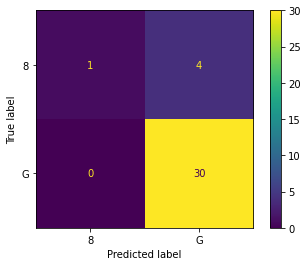

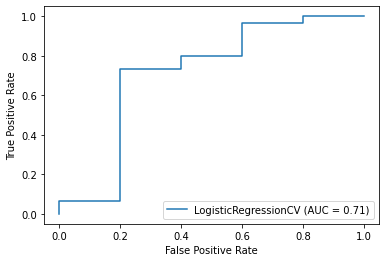

In [66]:
pred_test = clf.predict(x_test)
cm_test = confusion_matrix(y_test, pred_test)

accuracy = (cm_test[0,0]+ cm_test[1,1])/np.sum(cm_test)
avg_recall = (cm_test[0,0]/np.sum(cm_test[0,:]) + cm_test[1,1]/np.sum(cm_test[1,:]))/2
avg_precision = (cm_test[0,0]/np.sum(cm_test[:,0]) + cm_test[1,1]/np.sum(cm_test[:,1]))/2
avg_f1 = (2*cm_test[0,0]/(np.sum(cm_test[:,0])+ np.sum(cm_test[0,:])) + 2*cm_test[1,1]/(np.sum(cm_test[:,1])+ np.sum(cm_test[1,:])))/2
plot_confusion_matrix(clf, x_test,  y_test)
plot_roc_curve(clf, x_test,  y_test)

print(f"accuracy on test set:{accuracy}")
print(f"average recall on test set:{avg_recall}")
print(f"avg_precision on test set:{avg_precision}")
print(f"avg_f1 on test set:{avg_f1}")

* ### Conclusion on this part:
The G/8 dataset is more imbalanced than the q/o dataset, so the prediction is harder. This is concluded by comparing the results of the training on the stratified version of each dataset.

* On random splitted version the instances of 8 are lower in the test set (only 5 samples) so the perfomance is better on the test set as shown: AUC=0.63 -> AUC=0.71

## 1.3 Multiclass Classier

### G/8/o/q classifier with cross validation and stratified sampling.

accuracy on training set:0.8970099667774086
average recall on training set:0.8550538401429426
avg_precision on training set:0.925431512356502
avg_f1 on training set:0.8840422364231888


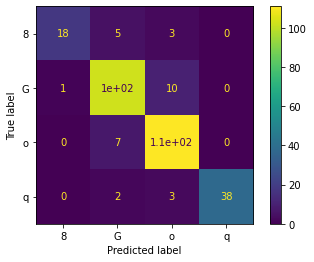

In [71]:
x_train, x_test, y_train, y_test = train_test_split(np.array([s for s in df.data]), df.target.to_numpy(), test_size=0.2, stratify=df.target.to_numpy(), shuffle=True)

# I particularly used this solver because it has slightly better results
clf = LogisticRegressionCV(solver='sag', max_iter=5000)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
cm_train = confusion_matrix(y_train, pred_train)

accuracy = (cm_train[0,0]+ cm_train[1,1]+ cm_train[2,2]+ cm_train[3,3])/np.sum(cm_train)
avg_recall = (cm_train[0,0]/np.sum(cm_train[0,:]) + cm_train[1,1]/np.sum(cm_train[1,:]) + cm_train[2,2]/np.sum(cm_train[2,:]) + cm_train[3,3]/np.sum(cm_train[3,:]))/4
avg_precision = (cm_train[0,0]/np.sum(cm_train[:,0]) + cm_train[1,1]/np.sum(cm_train[:,1])+ cm_train[2,2]/np.sum(cm_train[:,2]) + cm_train[3,3]/np.sum(cm_train[:,3]))/4
avg_f1 = (2*cm_train[0,0]/(np.sum(cm_train[:,0])+ np.sum(cm_train[0,:])) + 2*cm_train[1,1]/(np.sum(cm_train[:,1])+ np.sum(cm_train[1,:])) + 2*cm_train[2,2]/(np.sum(cm_train[:,2])+ np.sum(cm_train[2,:])) + 2*cm_train[3,3]/(np.sum(cm_train[:,3])+ np.sum(cm_train[3,:])))/4
plot_confusion_matrix(clf, x_train,  y_train)

print(f"accuracy on training set:{accuracy}")
print(f"average recall on training set:{avg_recall}")
print(f"avg_precision on training set:{avg_precision}")
print(f"avg_f1 on training set:{avg_f1}")


accuracy on test set:0.4868421052631579
average recall on test set:0.3276123301985371
avg_precision on test set:0.3339160839160839
avg_f1 on test set:0.31049221932812393


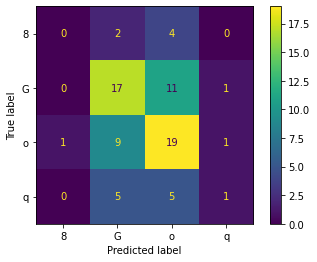

In [72]:
pred_test = clf.predict(x_test)
cm_test = confusion_matrix(y_test, pred_test)

accuracy = (cm_test[0,0]+ cm_test[1,1]+ cm_test[2,2]+ cm_test[3,3])/np.sum(cm_test)
avg_recall = (cm_test[0,0]/np.sum(cm_test[0,:]) + cm_test[1,1]/np.sum(cm_test[1,:]) + cm_test[2,2]/np.sum(cm_test[2,:]) + cm_test[3,3]/np.sum(cm_test[3,:]))/4
avg_precision = (cm_test[0,0]/np.sum(cm_test[:,0]) + cm_test[1,1]/np.sum(cm_test[:,1])+ cm_test[2,2]/np.sum(cm_test[:,2]) + cm_test[3,3]/np.sum(cm_test[:,3]))/4
avg_f1 = (2*cm_test[0,0]/(np.sum(cm_test[:,0])+ np.sum(cm_test[0,:])) + 2*cm_test[1,1]/(np.sum(cm_test[:,1])+ np.sum(cm_test[1,:])) + 2*cm_test[2,2]/(np.sum(cm_test[:,2])+ np.sum(cm_test[2,:])) + 2*cm_test[3,3]/(np.sum(cm_test[:,3])+ np.sum(cm_test[3,:])))/4
plot_confusion_matrix(clf, x_test,  y_test)

print(f"accuracy on test set:{accuracy}")
print(f"average recall on test set:{avg_recall}")
print(f"avg_precision on test set:{avg_precision}")
print(f"avg_f1 on test set:{avg_f1}")

### G/8/o/q classifier with cross validation and random sampling.

accuracy on training set:1.0
average recall on training set:1.0
avg_precision on training set:1.0
avg_f1 on training set:1.0


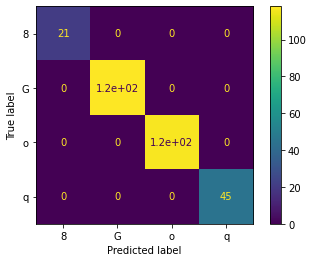

In [77]:
x_train, x_test, y_train, y_test = train_test_split(np.array([s for s in df.data]), df.target.to_numpy(), test_size=0.2, shuffle=True)

clf = LogisticRegressionCV(solver='sag', max_iter=5000)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
cm_train = confusion_matrix(y_train, pred_train)

accuracy = (cm_train[0,0]+ cm_train[1,1]+ cm_train[2,2]+ cm_train[3,3])/np.sum(cm_train)
avg_recall = (cm_train[0,0]/np.sum(cm_train[0,:]) + cm_train[1,1]/np.sum(cm_train[1,:]) + cm_train[2,2]/np.sum(cm_train[2,:]) + cm_train[3,3]/np.sum(cm_train[3,:]))/4
avg_precision = (cm_train[0,0]/np.sum(cm_train[:,0]) + cm_train[1,1]/np.sum(cm_train[:,1])+ cm_train[2,2]/np.sum(cm_train[:,2]) + cm_train[3,3]/np.sum(cm_train[:,3]))/4
avg_f1 = (2*cm_train[0,0]/(np.sum(cm_train[:,0])+ np.sum(cm_train[0,:])) + 2*cm_train[1,1]/(np.sum(cm_train[:,1])+ np.sum(cm_train[1,:])) + 2*cm_train[2,2]/(np.sum(cm_train[:,2])+ np.sum(cm_train[2,:])) + 2*cm_train[3,3]/(np.sum(cm_train[:,3])+ np.sum(cm_train[3,:])))/4
plot_confusion_matrix(clf, x_train,  y_train)

print(f"accuracy on training set:{accuracy}")
print(f"average recall on training set:{avg_recall}")
print(f"avg_precision on training set:{avg_precision}")
print(f"avg_f1 on training set:{avg_f1}")

accuracy on test set:0.35526315789473684
average recall on test set:0.3007983056370153
avg_precision on test set:0.35232007575757573
avg_f1 on test set:0.3133310795582601


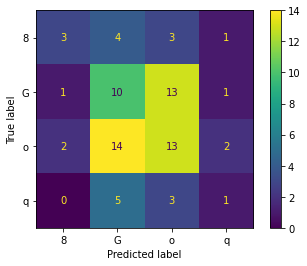

In [78]:
pred_test = clf.predict(x_test)
cm_test = confusion_matrix(y_test, pred_test)

accuracy = (cm_test[0,0]+ cm_test[1,1]+ cm_test[2,2]+ cm_test[3,3])/np.sum(cm_test)
avg_recall = (cm_test[0,0]/np.sum(cm_test[0,:]) + cm_test[1,1]/np.sum(cm_test[1,:]) + cm_test[2,2]/np.sum(cm_test[2,:]) + cm_test[3,3]/np.sum(cm_test[3,:]))/4
avg_precision = (cm_test[0,0]/np.sum(cm_test[:,0]) + cm_test[1,1]/np.sum(cm_test[:,1])+ cm_test[2,2]/np.sum(cm_test[:,2]) + cm_test[3,3]/np.sum(cm_test[:,3]))/4
avg_f1 = (2*cm_test[0,0]/(np.sum(cm_test[:,0])+ np.sum(cm_test[0,:])) + 2*cm_test[1,1]/(np.sum(cm_test[:,1])+ np.sum(cm_test[1,:])) + 2*cm_test[2,2]/(np.sum(cm_test[:,2])+ np.sum(cm_test[2,:])) + 2*cm_test[3,3]/(np.sum(cm_test[:,3])+ np.sum(cm_test[3,:])))/4
plot_confusion_matrix(clf, x_test,  y_test)

print(f"accuracy on test set:{accuracy}")
print(f"average recall on test set:{avg_recall}")
print(f"avg_precision on test set:{avg_precision}")
print(f"avg_f1 on test set:{avg_f1}")

* ### Conclusion on this part:
The classifier has a hard time predicting the classes with lower frequencies. As we can see the '8's and 'q's are misclassified most of the time. The models converged after a lot of iterations and the generalization is not sufficient at all. As the confusion matrix shows on the test set the model performs below %50. Similar to the binary classifiers, when we have exaggerated performance on training, the model cannot generalize well on the test set (overfitting in the last case). I think our vector representation for images puts much emphasis on the pixel values which are not perfect features to predict an image.